In [25]:
import os
import subprocess
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image

In [4]:
outlooks = np.array(['sunny', 'sunny', 'overcast', 'rain', 'rain', 'rain', 'overcast', 'sunny', 'sunny', 'rain'])
temperatures = np.array(['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool', 'mild', 'cool', 'mild'])
humidities = np.array(['high', 'high', 'high', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'normal'])
wind = np.array(['weak', 'strong', 'weak', 'weak', 'weak', 'strong', 'strong', 'weak', 'weak', 'weak'])
play_tennis = np.array(['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes'])

In [5]:
dataset = pd.DataFrame({"Outlook":outlooks, "Temperature":temperatures, "Humidity":humidities, "Wind":wind, "PlayTennis":play_tennis})

In [6]:
dataset

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,sunny,hot,high,weak,no
1,sunny,hot,high,strong,no
2,overcast,hot,high,weak,yes
3,rain,mild,high,weak,yes
4,rain,cool,normal,weak,yes
5,rain,cool,normal,strong,no
6,overcast,cool,normal,strong,yes
7,sunny,mild,high,weak,no
8,sunny,cool,normal,weak,yes
9,rain,mild,normal,weak,yes


In [10]:
outlook_le = LabelEncoder().fit(dataset['Outlook'])
temp_le = LabelEncoder().fit(dataset['Temperature'])
hum_le = LabelEncoder().fit(dataset['Humidity'])
wind_le = LabelEncoder().fit(dataset['Wind'])
play_le = LabelEncoder().fit(dataset['PlayTennis'])

In [53]:
outlook_oh = tf.one_hot(outlook_le.transform(dataset.Outlook), depth=3)
temp_oh = tf.one_hot(temp_le.transform(dataset.Temperature), depth=3)
hum_oh = tf.one_hot(hum_le.transform(dataset.Humidity), depth=3)
wind_oh = tf.one_hot(wind_le.transform(dataset.Wind), depth=3)
# play_oh = tf.one_hot(_le.transform(dataset.Outlook), depth=len(outlook_le.classes_))

In [63]:

train = np.array([
    outlook_oh.numpy(),
    temp_oh.numpy(),
    hum_oh.numpy(),
    wind_oh.numpy()
])
target = np.array({"PlayTennis": play_le.transform(dataset.PlayTennis)})

TypeError: array() takes from 1 to 2 positional arguments but 4 were given

In [59]:
train

array([[[0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.]],

       [[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.]],

       [[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.]],

       [[0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]]], dtype=float32)

In [60]:
target

array([[0, 0, 1, 1, 1, 0, 1, 0, 1, 1]])

In [61]:
dtc = DecisionTreeClassifier(random_state=42,
                                criterion='entropy'
                            )

In [62]:
dtc.fit(train, target)

ValueError: Found array with dim 3. Estimator expected <= 2.

In [20]:
export_graphviz(dtc, out_file="question3.dot", feature_names=train.columns)

In [21]:
bashCommand = 'dot -Tpng question3.dot -o question3.png'
process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
output, error = process.communicate()

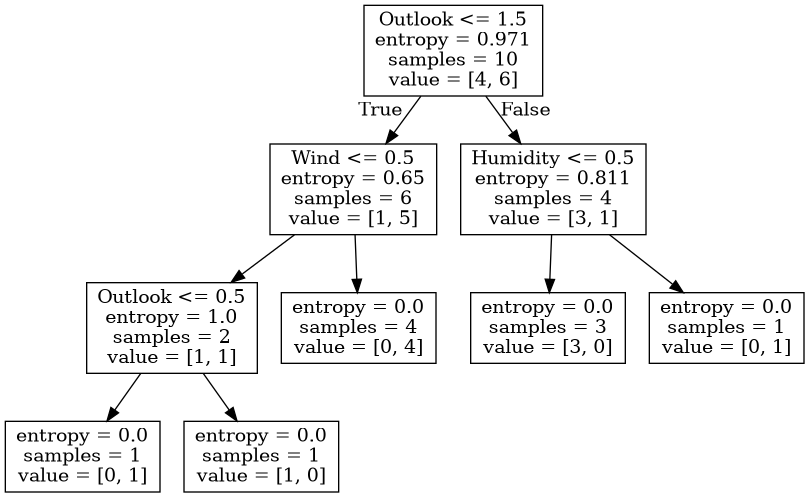

In [22]:
Image('question3.png')